# Before Text Preprocessing

## Dataset Info

In [2]:
import pandas as pd
file_path = r".\Ori_Emotion_Dataset\Emotions.csv"
data= pd.read_csv(file_path, encoding='ISO-8859-1')
data.head(10)

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4
5,i was beginning to feel quite disheartened,0
6,i would think that whomever would be lucky eno...,2
7,i fear that they won t ever feel that deliciou...,1
8,im forever taking some time out to have a lie ...,5
9,i can still lose the weight without feeling de...,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    416809 non-null  object
 1   label   416809 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ MB


## Unique Labels

In [5]:
file_path = r".\Ori_Emotion_Dataset\Emotions.csv"
data= pd.read_csv(file_path, encoding='ISO-8859-1')
unique_labels = data['label'].unique()
unique_labels, len(unique_labels)

(array([4, 0, 2, 1, 5, 3], dtype=int64), 6)

## Distribution of Six Emotion Labels

In [ ]:
import pandas as pd
file_path = r".\Ori_Emotion_Dataset\Emotions.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1')

label_counts = data['label'].value_counts()
total_rows = len(data) 
label_mapping = {
    0: "Sadness",
    1: "Joy",
    2: "Love",
    3: "Anger",
    4: "Fear",
    5: "Surprise"
}
for label, count in label_counts.items():
    label_name = label_mapping.get(label, "Unknown") 
    percentage = (count / total_rows) * 100 
    print(f"Label {label_name:<10}: {count:<6} rows ({percentage:.2f}%)")


Label Joy       : 141067 rows (33.84%)
Label Sadness   : 121187 rows (29.07%)
Label Anger     : 57317  rows (13.75%)
Label Fear      : 47712  rows (11.45%)
Label Love      : 34554  rows (8.29%)
Label Surprise  : 14972  rows (3.59%)


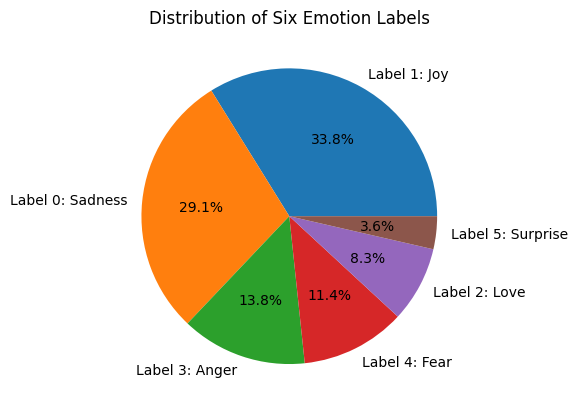

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r".\Ori_Emotion_Dataset\Emotions.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1')

def hate_NoHate_percenatge(label):
    if label == 0:
        return "Label 0: Sadness"
    elif label == 1:
        return "Label 1: Joy"
    elif label == 2:
        return "Label 2: Love"
    elif label == 3:
        return "Label 3: Anger"
    elif label == 4:
        return "Label 4: Fear"
    elif label == 5:
        return "Label 5: Surprise"

data['label'] = data['label'].apply(hate_NoHate_percenatge)

plt.pie(data['label'].value_counts(), labels=data['label'].value_counts().index, autopct='%1.1f%%')
plt.title("Distribution of Six Emotion Labels")
plt.show()


## Check Duplicated

In [3]:
file_path = r".\Ori_Emotion_Dataset\Emotions.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)

num_duplicates = data.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 686


In [1]:
# check duplicated after drop unsed column
import pandas as pd
file_path = r".\Pre_Emotion_Dataset\1_drop_column.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)

num_duplicates = data.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 418


# After Text Preprocessing

## Data Info

In [1]:
import pandas as pd
file_path = r".\Pre_Emotion_Dataset\8_Lemmatization.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1')
print("After Text Preprocessing:")
data.info()

After Text Preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245666 entries, 0 to 245665
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    245666 non-null  object
 1   label   245666 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


## Distribution of Six Emotion Labels

In [3]:
import pandas as pd
file_path = r".\Pre_Emotion_Dataset\8_Lemmatization.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1')

label_counts = data['label'].value_counts()
total_rows = len(data) 
label_mapping = {
    0: "Joy",
    1: "Anger",
    2: "Love",
    3: "Fear"
}
for label, count in label_counts.items():
    label_name = label_mapping.get(label, "Unknown") 
    percentage = (count / total_rows) * 100 
    print(f"Label {label_name:<10}: {count:<6} rows ({percentage:.2f}%)")


Label Joy       : 140776 rows (57.30%)
Label Anger     : 57229  rows (23.30%)
Label Love      : 47661  rows (19.40%)


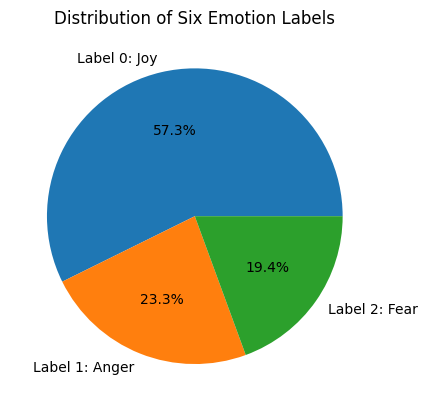

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r".\Pre_Emotion_Dataset\8_Lemmatization.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1')

def hate_NoHate_percenatge(label):
    if label == 0:
        return "Label 0: Joy"
    elif label == 1:
        return "Label 1: Anger"
    elif label == 2:
        return "Label 2: Fear"

data['label'] = data['label'].apply(hate_NoHate_percenatge)

plt.pie(data['label'].value_counts(), labels=data['label'].value_counts().index, autopct='%1.1f%%')
plt.title("Distribution of Six Emotion Labels")
plt.show()


## Word Frequency

Most common words:
 [('feel', 253774), ('not', 53213), ('like', 42511), ('get', 20378), ('make', 18277), ('go', 17094), ('know', 15409), ('really', 15082), ('time', 14901), ('would', 13665)]


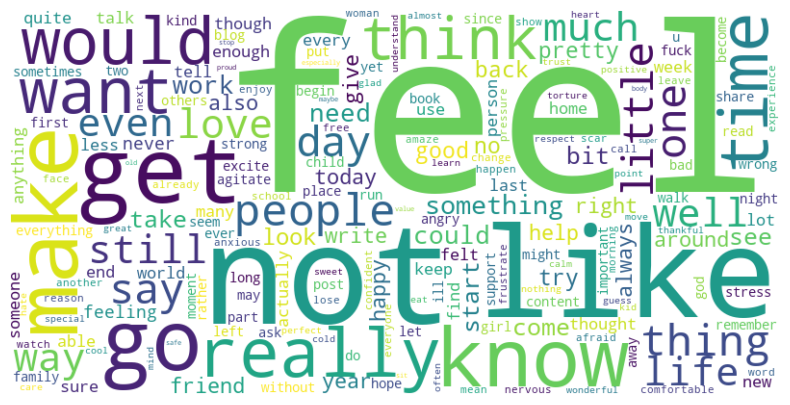

In [ ]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

file_path = r".\Pre_Emotion_Dataset\8_Lemmatization.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

text_data = ' '.join(df['text'].astype(str)) 
words = word_tokenize(text_data)

word_counts = Counter(words)
most_common_words = word_counts.most_common(10) 
print("Most common words:\n", most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


Most common words:
 [('feel', 49546), ('not', 10215), ('like', 6366), ('go', 3876), ('get', 3634), ('little', 3517), ('know', 3464), ('make', 3221), ('time', 2978), ('really', 2802)]


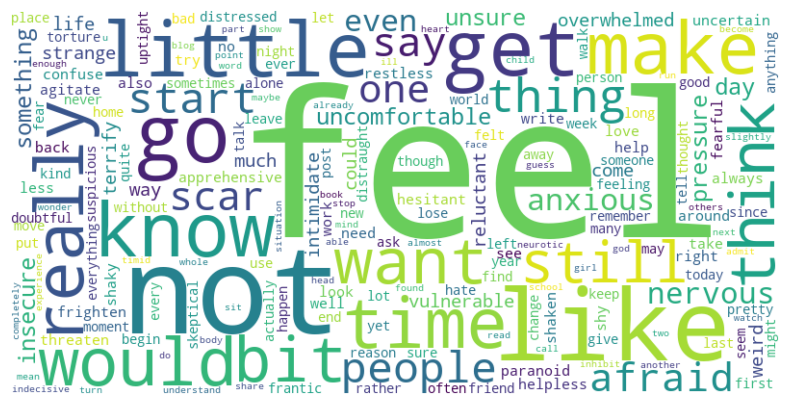

In [4]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

file_path = r".\Pre_Emotion_Dataset\8_Lemmatization.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

df_label_1 = df[df['label'] == 2]

text_data = ' '.join(df_label_1['text'].astype(str)) 
words = word_tokenize(text_data)

word_counts = Counter(words)
most_common_words = word_counts.most_common(10) 
print("Most common words:\n", most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


## Unknown Word

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


             word  frequency
2          others       2344
8     overwhelmed       1785
25             et        627
26         cetera        619
29       facebook        437
41       blogging        430
27        happens        411
237           soo        314
1002           gt        263
433          haha        234
249      betrayed        195
46           alot        180
904        brings        174
21         judged        170
175        feelin        166
104        allows        138
573        deeper        131
592    challenged        130
396     everytime        125
3           dunno        120


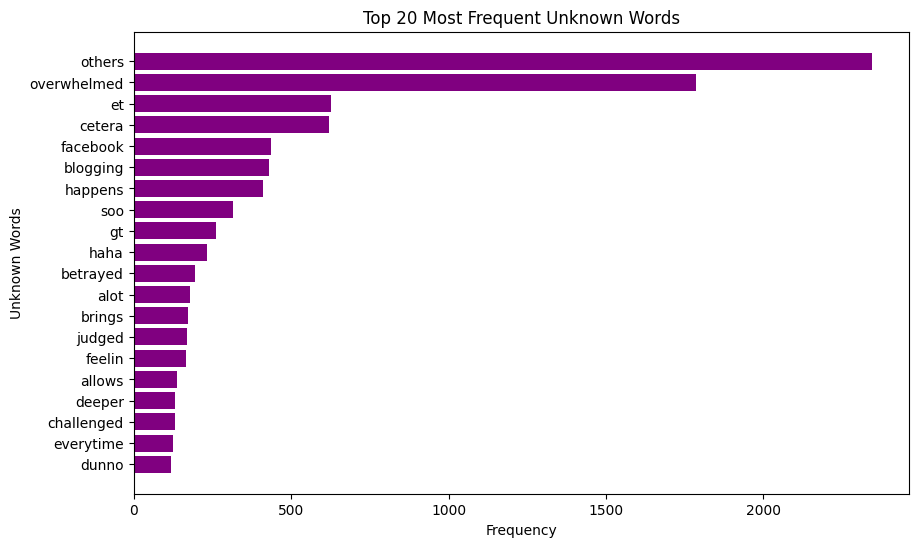

In [8]:
import pandas as pd
import re
from nltk.corpus import wordnet, words
import nltk
from collections import Counter
import matplotlib.pyplot as plt

nltk.download('wordnet')
nltk.download('words')

file_path = r".\Pre_Emotion_Dataset\8_Lemmatization.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)
text_data = data['text']

combined_vocab = set(words.words()) | set(wordnet.words())

def find_unknown_words_combined(text):
    if not isinstance(text, str):  # Skip non-string values
        return []
    words_in_text = re.findall(r'\b\w+\b', text.lower())  # Extract words (ignoring punctuation)
    return [word for word in words_in_text if word not in combined_vocab]
data['unknown_words'] = data['text'].apply(find_unknown_words_combined)

# Flatten all unknown words into a single list
all_unknown_words = [word for words in data['unknown_words'] for word in words]

# Calculate the frequency of each unknown word
unknown_word_freq = Counter(all_unknown_words)

# Convert frequency to a DataFrame for visualization
freq_df = pd.DataFrame(unknown_word_freq.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)
print(freq_df.head(20))

top_unknown = freq_df.head(20)
plt.figure(figsize=(10, 6))
plt.barh(top_unknown['word'], top_unknown['frequency'], color='purple')
plt.xlabel('Frequency')
plt.ylabel('Unknown Words')
plt.title('Top 20 Most Frequent Unknown Words')
plt.gca().invert_yaxis()
plt.show()


## Pos Tag

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


     POS   Count
0     NN  923354
2     JJ  456373
1     RB  266806
4     VB  242821
6    VBP  114940
8     IN   79238
13   NNS   48342
3    VBD   34442
9     MD   30758
18   VBN   19014
16    CD   15227
15   VBG   12704
17    DT   12254
12   VBZ    6632
10   RBR    5011
7    JJS    4577
14   JJR    4289
19    RP    2699
25    CC    1767
23    FW    1608
22    WP    1346
29   WRB    1116
24   WDT     932
5    PRP     871
21   NNP     807
20    TO     698
26    EX     421
28    UH     320
27   RBS     267
11   WP$     194
31  PRP$     118
32   SYM      17
33   PDT      15
30   POS       7
35     $       7
34    ''       2


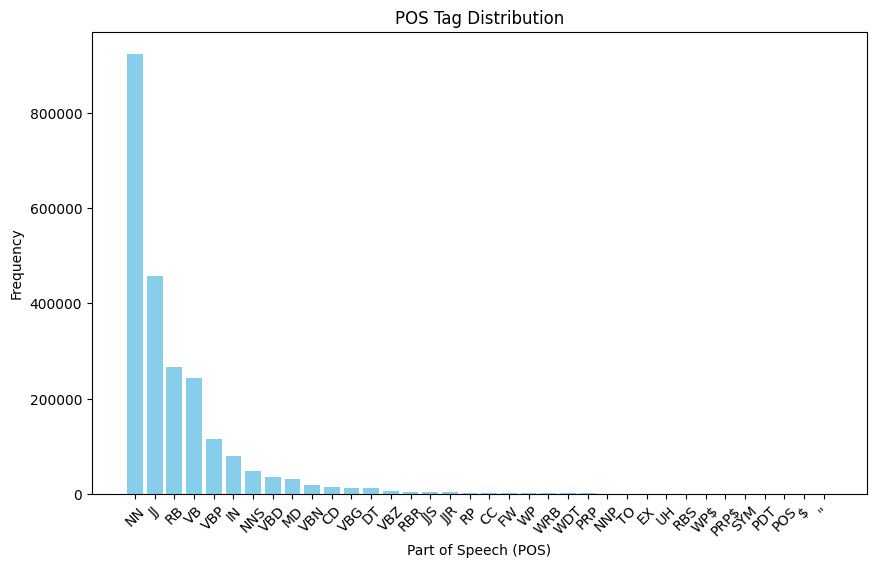

In [12]:
import pandas as pd
import nltk
from nltk import pos_tag, word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

file_path = r".\Pre_Emotion_Dataset\8_Lemmatization.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)
text_data = data['text'] 

def get_pos_tags(text):
    if not isinstance(text, str):  # Skip non-string values
        return []
    tokens = word_tokenize(text)  # Tokenize the text
    return pos_tag(tokens)  # Get POS tags for tokens

# Apply POS tagging to the text
data['pos_tags'] = data['text'].apply(get_pos_tags)

# Flatten all POS tags into a single list
all_pos_tags = [tag for tags in data['pos_tags'] for _, tag in tags]

# Count the occurrences of each POS tag
pos_counts = Counter(all_pos_tags)

# Convert POS counts to a DataFrame for visualization
pos_df = pd.DataFrame(pos_counts.items(), columns=['POS', 'Count']).sort_values(by='Count', ascending=False)
# Display the POS tag distribution
print(pos_df)

# Plot the POS tag distribution
plt.figure(figsize=(10, 6))
plt.bar(pos_df['POS'], pos_df['Count'], color='skyblue')
plt.xlabel('Part of Speech (POS)')
plt.ylabel('Frequency')
plt.title('POS Tag Distribution')
plt.xticks(rotation=45)
plt.show()


## Bigrams

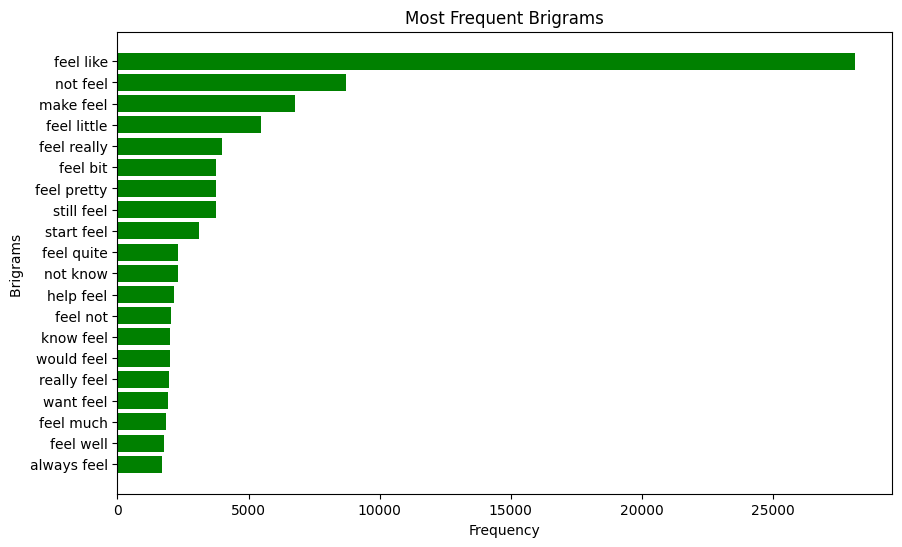

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

file_path = r".\Pre_Emotion_Dataset\8_Lemmatization.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)

text_data = data['text']

# Create a CountVectorizer for bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(text_data)

# Use sparse matrix to sum up bigram counts
bigram_counts = np.array(X.sum(axis=0)).flatten()  
bigram_freq = pd.DataFrame({
    'bigram': vectorizer.get_feature_names_out(),
    'frequency': bigram_counts
})

# Sort by frequency in descending order and take the top 20
bigram_freq = bigram_freq.sort_values(by='frequency', ascending=False).head(20)

# Plot the most frequent bigrams
plt.figure(figsize=(10, 6))
plt.barh(bigram_freq['bigram'], bigram_freq['frequency'], color='green')  
plt.xlabel('Frequency')
plt.ylabel('Brigrams ')
plt.title('Most Frequent Brigrams')
plt.gca().invert_yaxis()  
plt.show()


## Trigrams

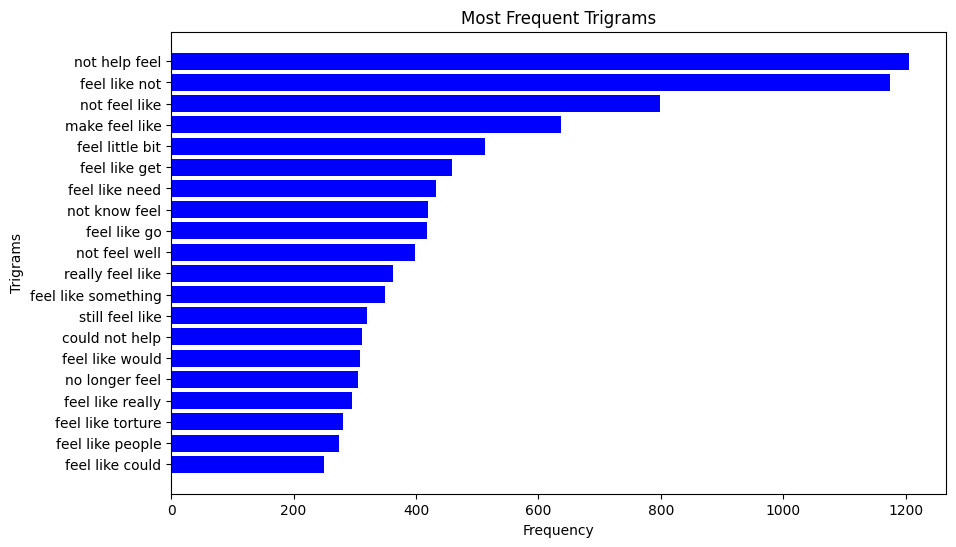

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

file_path = r".\Pre_Emotion_Dataset\8_Lemmatization.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)

text_data = data['text']

# Create a CountVectorizer for trigrams
vectorizer = CountVectorizer(ngram_range=(3, 3))
X = vectorizer.fit_transform(text_data)

# Use sparse matrix to sum up trigram counts
trigram_counts = np.array(X.sum(axis=0)).flatten()  
trigram_freq = pd.DataFrame({
    'trigram': vectorizer.get_feature_names_out(),
    'frequency': trigram_counts
})

# Sort by frequency in descending order and take the top 20
trigram_freq = trigram_freq.sort_values(by='frequency', ascending=False).head(20)

# Plot the most frequent trigrams
plt.figure(figsize=(10, 6))
plt.barh(trigram_freq['trigram'], trigram_freq['frequency'], color='blue')  
plt.xlabel('Frequency')
plt.ylabel('Trigrams')
plt.title('Most Frequent Trigrams')
plt.gca().invert_yaxis()  
plt.show()
